# DCT and Hadamard-Walsh Transform


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
def walsh(img,inv=False):
    img = pad_image(img.copy())
    Hn = get_matrix(img.shape[0])
    
    if(img.shape[0]==img.shape[1]):
        Hm=Hn
    else:
        Hm = get_matrix(img.shape[1])

    if(inv):
        return np.matmul(np.matmul(Hn.transpose(),img),Hm)
    else:
        return np.matmul(np.matmul(Hn,img),Hm.transpose())

def get_matrix(size):
    # Generating Hadamard matrix of size 'size'
    n = int(math.log(size, 2))

    H2 = np.ones((2,2),dtype=np.float32)
    H2[1,1]=-1
    H=H2
    for idx in range(0,n-1):
        H=np.kron(H2,H)

    # Producing Walsh-Hadamard matrix by ordering frequencies in ascending order
    n=np.zeros(size,dtype=np.int8)
    for i in range(0,size-1):
        n+=1*(H[:,i]!=H[:,i+1])
        
    return 1/size*H[:,np.argsort(n)]

def next_power_of_2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

def pad_image(img):
    wold=img.shape[1]
    wnew = next_power_of_2(wold)
    hold=img.shape[0]
    hnew = next_power_of_2(hold)
    delta_w = wnew - wold
    delta_h = hnew - hold

    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    return cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)   

In [3]:
lena_img = cv2.imread(os.path.relpath('../../Data/Lena.png'), cv2.IMREAD_GRAYSCALE)
#  I was having some issues with rounding/clipping because its an 8 bit np.array
lena_img=lena_img.astype(np.double)


In [4]:
# Preform the Walsh transform
lena_walsh=walsh(lena_img)

# let's zero the data for compression

lena_walsh_compr = lena_walsh.copy()

lena_walsh_compr[lena_walsh.shape[0]:,:]=0
lena_walsh_compr[:,lena_walsh.shape[1]:]=0


In [5]:
# Now, use the inverse Walsh 
lena_compr=walsh(lena_walsh_compr,inv=True)
lena_full=walsh(lena_walsh,inv=True)


Text(0.5, 1.0, 'Compressed')

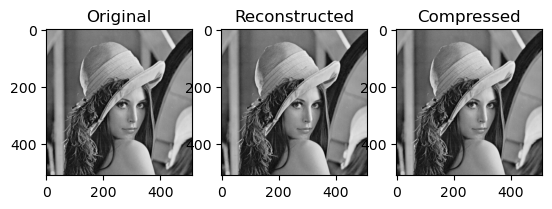

In [6]:

plt.subplot(131); plt.imshow(lena_img,cmap='gray'); plt.title('Original')
plt.subplot(132); plt.imshow(lena_full,cmap='gray'); plt.title('Reconstructed')
plt.subplot(133); plt.imshow(lena_compr,cmap='gray'); plt.title('Compressed')
